In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns


In [3]:
premium = pd.read_csv('landscape_2018_AlabamatoMontana.csv',skiprows=3)
premium.head()

FileNotFoundError: [Errno 2] No such file or directory: 'landscape_2018_AlabamatoMontana.csv'

### 1.a. 

In [ ]:
# number of rows with data
rows_with_data = premium.count(axis = 'rows')
rows_with_data

In [ ]:
# number of variables with data
variables_with_data = premium.count(axis = 'columns')
variables_with_data

### 1.b. 

In [ ]:
# Check if all the ID data are the same type
print(premium['Plan ID'].dtypes)
premium.dropna(subset = ['Plan ID','Segment ID','Contract ID'], inplace = True)
premium['Plan ID'] = premium['Plan ID'].astype(int)
print(premium['Segment ID'].dtypes)
premium['Segment ID'] = premium['Segment ID'].astype(int)

In [ ]:
# number of products
premium[['Contract ID', 'Plan ID', 'Segment ID']].drop_duplicates().count().iloc[0]

In [ ]:
# number of organizations
premium['Organization Name'].nunique()

In [ ]:
# which organization sell the most products
premium.drop_duplicates(subset = ['Contract ID', 'Plan ID', 'Segment ID'])['Organization Name'].value_counts()

### 1.c.

In [ ]:
# count duplicates
premium[['Contract ID', 'Plan ID', 'Segment ID','County','State']].count().iloc[0] - premium[['Contract ID', 'Plan ID', 'Segment ID','County','State']].drop_duplicates().count().iloc[0]

In [ ]:
# drop duplicates
premium = premium.drop_duplicates()
premium.count(axis = 'rows')

### 1.d. 

In [ ]:
premium1 = premium[premium['Plan Type'] != 'Medicare Prescription Drug Plan']
premium['Plan Type'].count() - premium1['Plan Type'].count()

In [ ]:
premium2 = premium1[premium1['Special Needs Plan'] != 'Yes']
premium['Plan Type'].count() - premium2['Plan Type'].count()

### 1.e.

In [ ]:
# convert price to numbers
premium2[['Part C Premium2','Part D Basic Premium3','Part D Supplemental Premium4','Part D Total Premium5',
          'Part D Premium Obligation with Full Premium Assistance6','Part D Premium Obligation with 75% Premium Assistance',
          'Part D Premium Obligation with 50% Premium Assistance','Part D Premium Obligation with 25% Premium Assistance',
          'Part D Drug Deductible']] = premium2[['Part C Premium2','Part D Basic Premium3','Part D Supplemental Premium4','Part D Total Premium5',
          'Part D Premium Obligation with Full Premium Assistance6','Part D Premium Obligation with 75% Premium Assistance',
          'Part D Premium Obligation with 50% Premium Assistance','Part D Premium Obligation with 25% Premium Assistance',
          'Part D Drug Deductible']].replace('[\$,]', '', regex=True).astype(float)
premium2.head()

In [ ]:
#create total premium column
premium2 = premium2.drop(columns = ['Part D Basic Premium3','Part D Supplemental Premium4',
          'Part D Premium Obligation with Full Premium Assistance6','Part D Premium Obligation with 75% Premium Assistance',
          'Part D Premium Obligation with 50% Premium Assistance','Part D Premium Obligation with 25% Premium Assistance',
          'Part D Drug Deductible'])

premium2['Total Premium'] = premium2['Part C Premium2'] + premium2['Part D Total Premium5']
premium2.dropna(subset = ['Total Premium'], inplace = True)
premium2

### 1.f.

In [ ]:
# i 
form1 = premium2.groupby('State')['Total Premium'].agg(['min', 'mean', 'median', 'max'])
form1.to_csv('form1.csv')
form1

In [ ]:
# i. fraction
premium2['temp'] = premium2['Total Premium'] == 0
form2 = premium2.groupby('State')['temp'].mean()
form2.to_csv('form2.csv')
form2

In [ ]:
#iii
premium2.groupby('Plan Type')['Total Premium'].agg(['min', 'mean', 'median', 'max'])

In [ ]:
premium2.groupby('Organization Name')['Total Premium'].agg(['min', 'mean', 'median', 'max'])

### 1.g.

In [ ]:
premium2.to_csv('premium2.csv', index=False)

### 2.a.

In [ ]:
enroll = pd.read_csv('enrollment_2018.csv')
enroll.shape
enroll

### 2.b.

In [ ]:
enroll.dropna(subset = ['State','State'], inplace = True)
enroll.shape

### 2.c.

In [ ]:
enroll.replace({'*':0},inplace=True)
enroll

In [ ]:
enroll['Enrollment'] = enroll['Enrollment'].astype(int)

In [ ]:
enroll['Enrollment'].sum()

In [ ]:
enroll.groupby('State')['Enrollment'].max().idxmax()

### 2.d.

In [ ]:
print(enroll['Plan ID'].dtypes)
enroll.dropna(subset = ['Plan ID','Contract Number'], inplace = True)
# count duplicates
enroll[enroll.duplicated(subset = ['Contract Number', 'Plan ID','State','County'])]

In [ ]:
# Aggregate dupplicates
enroll.groupby(['Contract Number', 'Plan ID','State','County'])['Enrollment'].sum().shape

In [ ]:
enroll.drop('Enrollment', axis = 1)

In [ ]:
temp = enroll.groupby(['Contract Number', 'Plan ID','State','County'])['Enrollment'].sum().reset_index()

In [ ]:
temp

### 2.e.

In [ ]:
state_map = {"AL": "Alabama",
  "AK": "Alaska",
  "AZ": "Arizona",
  "AR": "Arkansas",
  "CA": "California",
  "CO": "Colorado",
  "CT": "Connecticut",
  "DE": "Delaware",
  "DC": "District of Columbia",
  "FL": "Florida",
  "GA": "Georgia",
  "HI": "Hawaii",
  "ID": "Idaho",
  "IL": "Illinois",
  "IN": "Indiana",
  "IA": "Iowa",
  "KS": "Kansas",
  "KY": "Kentucky",
  "LA": "Louisiana",
  "ME": "Maine",
  "MT": "Montana",
  "NE": "Nebraska",
  "NV": "Nevada",
  "NH": "New Hampshire",
  "NJ": "New Jersey",
  "NM": "New Mexico",
  "NY": "New York",
  "NC": "North Carolina",
  "ND": "North Dakota",
  "OH": "Ohio",
  "OK": "Oklahoma",
  "OR": "Oregon",
  "MD": "Maryland",
  "MA": "Massachusetts",
  "MI": "Michigan",
  "MN": "Minnesota",
  "MS": "Mississippi",
  "MO": "Missouri",
  "PA": "Pennsylvania",
  "RI": "Rhode Island",
  "SC": "South Carolina",
  "SD": "South Dakota",
  "TN": "Tennessee",
  "TX": "Texas",
  "UT": "Utah",
  "VT": "Vermont",
  "VA": "Virginia",
  "WA": "Washington",
  "WV": "West Virginia",
  "WI": "Wisconsin",
  "WY": "Wyoming"}

In [ ]:
temp = temp[temp['State'].apply(lambda x: x not in ['PR','GU','AS','VI','MP'])]

In [ ]:
temp['State'] = temp['State'].apply(lambda x: state_map[x])
temp

### 2.f.

In [ ]:
temp.to_csv('enroll2.csv', index=False)

### 3.a.

In [ ]:
premium2
premium2.columns

In [ ]:
premium2_temp = premium2.groupby(['Contract ID', 'Plan ID','State','County'])['Total Premium'].mean().reset_index()
premium2_temp

In [ ]:
premium_new = premium2.merge(premium2_temp, on = ['Contract ID', 'Plan ID','State','County','Total Premium'],
                       how = 'right').drop(columns = ['Plan Name','Segment ID',
                                                      'Organization Type','Special Needs Plan', 'Special Needs Plan Type', 'Benefit Type',
       'Part D Basic Premium Below Regional Benchmark?', 'National PDP',
       'Part C Premium2', 'Part D Total Premium5',
       'Tiers Not Subject to Deductible7', 'Increased Initial Coverage Limit8',
       'Extra Coverage in Gap', 'Unnamed: 26', 'temp'])
premium_new

In [ ]:
premium_new.shape[0]

### 3.b.

In [ ]:
temp.shape

In [ ]:
# get the list of states in the price df
unique_states = premium_new['State'].unique()
unique_states

In [ ]:
enroll_new = temp[temp['State'].isin(unique_states)] 
enroll_new.shape

In [ ]:
(temp.shape[0] - enroll_new.shape[0])/temp.shape[0]

In [ ]:
enroll_new = enroll_new.rename(columns={"Contract Number":"Contract ID"})
enroll_new

### 3.c.

In [ ]:
# check if there is any NA in the datasets
if enroll_new.isna().values.any():
    print("There are missing values in the DataFrame.")
else:
    print("There are no missing values in the DataFrame.")
    
if premium_new.isna().values.any():
    print("There are missing values in the DataFrame.")
else:
    print("There are no missing values in the DataFrame.")

In [ ]:
# All the NAs that will appear next are generated in merging.

In [ ]:
df_merge = enroll_new.merge(premium_new, on = ['Contract ID', 'Plan ID','State','County'],
                       how = 'outer',
                           indicator=True)

In [ ]:
df_merge

In [ ]:
df_merge['_merge'].value_counts()

In [ ]:
(df_merge['_merge'] == 'both').mean()

### 3.d.

In [ ]:
#fraction of the price data has any match was indicated by merge type "both", 
#therefore, we can get the fraction by dividing number of "both" by length of price dataset
fraction1 = 12086 / 12096
fraction1

In [ ]:
#Select unmatched data
df_merge1 = df_merge[df_merge['_merge'] == 'right_only']
df_merge1

In [ ]:
#Test if states and counties of the unmatched data also exist in the enrollment data
temp1 = df_merge1[['State','County']].drop_duplicates()
df_merge2 = enroll_new.merge(temp1, on = ['State','County'],
                       how = 'right',
                           indicator=True)
df_merge2
# Their states and counties are not in the enrollment data.

In [ ]:
#Test if contract and plan id of the unmatched data also exist in the enrollment data
temp2 = df_merge1[['Contract ID','Plan ID']].drop_duplicates()
df_merge3 = enroll_new.merge(temp2, on = ['Contract ID','Plan ID'],
                       how = 'right',
                           indicator=True)
df_merge3

In [ ]:
# The difference between matched and unmatched data is that the combinations of state and county of the unique products do not
# exist in the enrollment data, which in reality means that people from that region who paid premiums for the MA plans
# were not recorded in the enrollment data (or were dropped in previous process)

### 3.e.

In [ ]:
# Assumption, the reason why State-county combination: "California,Los Angeles (Partial)" &"Arizona ,Pinal (Partial)"
# not in the enrollment data is because of the "(Partial)"
# Check if there is any "California,Los Angeles" & "Arizona ,Pinal" combination in the enrollment data.
is_value_in_State = enroll_new['State'].isin(['California','Arizona']).any()
is_value_in_State

In [ ]:
is_value_in_County = enroll_new['County'].isin(['Los Angeles','Pinal']).any()
is_value_in_County

In [ ]:
premium_new

In [ ]:
# Replace "California,Los Angeles (Partial)" & "Arizona ,Pinal (Partial)" with "California,Los Angeles" & "Arizona ,Pinal"
premium_new['County'] = premium_new[['County']].replace('Los Angeles (Partial)', 'Los Angeles').replace('Pinal (Partial)', 'Pinal')
premium_new

In [ ]:
df_merge_new = enroll_new.merge(premium_new, on = ['Contract ID', 'Plan ID','State','County'],
                       how = 'outer',
                           indicator=True)
df_merge_new

In [ ]:
df_merge4 = df_merge_new[df_merge_new['_merge'] == 'right_only']
df_merge4

In [ ]:
# There is no county named "LaSalle" in the enrollment data.
is_value_in_County1 = enroll_new['County'].isin(['LaSalle']).any()
is_value_in_County1

In [ ]:
#That is because "LaSalle" was recorded as "La Salle".
enroll_new[enroll_new['County'].apply(lambda x: True if 'La Salle' in x else False)]

In [ ]:
premium_new['County'] = premium_new[['County']].replace('LaSalle', 'La Salle')
premium_new

In [ ]:
df_merge_new1 = enroll_new.merge(premium_new, on = ['Contract ID', 'Plan ID','State','County'],
                       how = 'outer',
                           indicator=True)
df_merge_new1

In [ ]:
df_merge_new1['_merge'].value_counts()

### 3.f.

In [ ]:
df_merge_new1['Total Premium'].notna().mean()

In [ ]:
temp_2 = df_merge_new1[['State', 'Total Premium']].apply(lambda x: dct[x['State']] if pd.isna(x['Total Premium']) else x['Total Premium'],axis = 1)
df_merge_new1['Total Premium1'] = temp_2

In [ ]:
df_merge_new2 = df_merge_new1.drop(columns = ['_merge','Total Premium'])
df_merge_new2

### 3.g.

In [ ]:
df_merge_new3 = df_merge_new1.drop(columns = ['_merge','Total Premium1']).dropna()
df_merge_new3

### 3.h.

In [ ]:
#i
df_merge_new3['contract_plan'] = df_merge_new3['Contract ID'] + df_merge_new3['Plan ID'].astype('str')
df_hist = df_merge_new3.groupby('County')['contract_plan'].count().reset_index()

In [ ]:
df_hist

In [1]:
df_hist

NameError: name 'df_hist' is not defined

<AxesSubplot:xlabel='County', ylabel='contract_plan'>

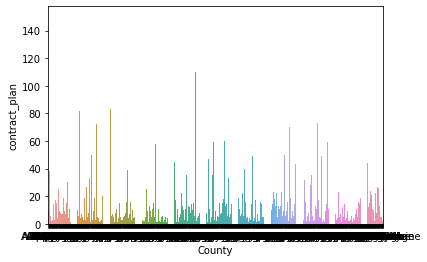

In [588]:
#import library
import seaborn as sns

#Using distplot function, create a graph
sns.barplot(data = df_hist, x = 'County', y = 'contract_plan')

<AxesSubplot:xlabel='Organization Name', ylabel='contract_plan'>

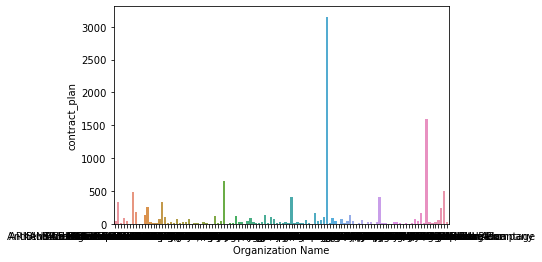

In [589]:
#ii
df_merge_new3['contract_plan'] = df_merge_new3['Contract ID'] + df_merge_new3['Plan ID'].astype('str')
df_hist_o = df_merge_new3.groupby('Organization Name')['contract_plan'].count().reset_index()
df_hist_o
sns.barplot(data = df_hist_o, x = 'Organization Name', y = 'contract_plan')

In [598]:
df_merge_new3

,Contract ID,Plan ID,State,County,Enrollment,Organization Name,Plan Type,Total Premium,contract_plan
4947,H0028,4,Hawaii,Honolulu,2759,"CHA HMO, Inc.",HMO,0.0,H00284
4948,H0028,4,Hawaii,Kauai,1436,"CHA HMO, Inc.",HMO,0.0,H00284
4949,H0028,4,Hawaii,Maui,2322,"CHA HMO, Inc.",HMO,0.0,H00284
4966,H0028,8,Iowa,Benton,192,"CHA HMO, Inc.",HMO,0.0,H00288
4967,H0028,8,Iowa,Black Hawk,604,"CHA HMO, Inc.",HMO,0.0,H00288
...,...,...,...,...,...,...,...,...,...
697144,R7444,8,Georgia,Whitfield,767,UnitedHealthcare,Regional PPO,39.0,R74448
697145,R7444,8,Georgia,Wilcox,82,UnitedHealthcare,Regional PPO,39.0,R74448
697146,R7444,8,Georgia,Wilkes,163,UnitedHealthcare,Regional PPO,39.0,R74448
697147,R7444,8,Georgia,Wilkinson,128,UnitedHealthcare,Regional PPO,39.0,R74448


In [590]:
#iii
county_enrollment_count = df_merge_new3.groupby('County')['Enrollment'].sum().reset_index().rename(columns ={'Enrollment': 'total_enrollment'})
# df_merge_new3 = df_merge_new3.merge(county_enrollment_count, on ='County', how = 'inner')

In [591]:
county_enrollment_count

,County,total_enrollment
0,Acadia,1227
1,Ada,32023
2,Adair,809
3,Adams,27662
4,Aitkin,550
...,...,...
989,Yellowstone,6414
990,Yolo,6659
991,York,12619
992,Yuba,436


In [612]:
temp = df_merge_new3.groupby(['Contract ID', 'Plan ID','County'])['Enrollment'].sum().reset_index()

In [613]:
temp = temp.merge(county_enrollment_count, on ='County')
temp['market_share'] = (temp['Enrollment']/temp['total_enrollment'])**2

In [614]:
temp = temp.groupby('County')['market_share'].sum().reset_index()

In [618]:
temp

,County,market_share
0,Acadia,0.259241
1,Ada,0.147682
2,Adair,0.190571
3,Adams,0.167656
4,Aitkin,0.185230
...,...,...
989,Yellowstone,0.398339
990,Yolo,0.164689
991,York,0.232482
992,Yuba,0.504640


<AxesSubplot:xlabel='County', ylabel='market_share'>

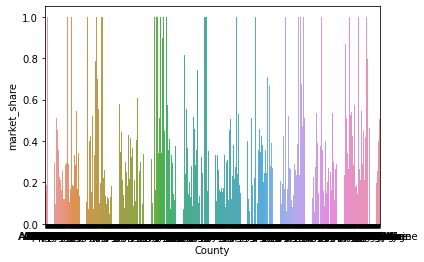

In [617]:
sns.barplot(data = temp, x = 'County', y = 'market_share')

In [623]:
#iv
org_county = df_merge_new3.groupby(['Organization Name', 'County'])['Enrollment'].sum().reset_index().rename(columns = {'Enrollment': 'org_county_summed_en'})
df_merge_new3 = df_merge_new3.merge(org_county, on = ['Organization Name', 'County'])
df_merge_new3['org_county_summed_en'] = df_merge_new3['org_county_summed_en'].apply(lambda x: x**2)

In [629]:
three_v_to_plot = df_merge_new3.groupby(['County','Organization Name'])['org_county_summed_en'].sum().reset_index()

In [631]:
three_v_to_plot['county_org'] = three_v_to_plot['County'] + three_v_to_plot['Organization Name']

In [632]:
three_v_to_plot

,County,Organization Name,org_county_summed_en,county_org
0,Acadia,HMO Louisiana,14161,AcadiaHMO Louisiana
1,Acadia,"Humana Health Benefit Plan of Louisiana, Inc.",272484,"AcadiaHumana Health Benefit Plan of Louisiana,..."
2,Acadia,Humana Insurance Company,95922,AcadiaHumana Insurance Company
3,Acadia,Peoples Health,3364,AcadiaPeoples Health
4,Acadia,"Vantage Health Plan, Inc.",5184,"AcadiaVantage Health Plan, Inc."
...,...,...,...,...
4811,York,"Harvard Pilgrim Health Care, Inc.",693842,"YorkHarvard Pilgrim Health Care, Inc."
4812,York,Martin's Point Generations Advantage,74043072,YorkMartin's Point Generations Advantage
4813,York,UnitedHealthcare,49353408,YorkUnitedHealthcare
4814,Yuba,Kaiser Permanente,380192,YubaKaiser Permanente


<AxesSubplot:xlabel='county_org', ylabel='org_county_summed_en'>

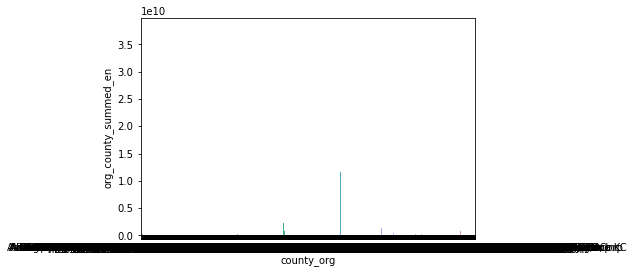

In [633]:
sns.barplot(data = three_v_to_plot, x = 'county_org', y = 'org_county_summed_en')
sns_plot.savefig("3v.png")

In [634]:
# v
three_v_to_plot

,County,Organization Name,org_county_summed_en,county_org
0,Acadia,HMO Louisiana,14161,AcadiaHMO Louisiana
1,Acadia,"Humana Health Benefit Plan of Louisiana, Inc.",272484,"AcadiaHumana Health Benefit Plan of Louisiana,..."
2,Acadia,Humana Insurance Company,95922,AcadiaHumana Insurance Company
3,Acadia,Peoples Health,3364,AcadiaPeoples Health
4,Acadia,"Vantage Health Plan, Inc.",5184,"AcadiaVantage Health Plan, Inc."
...,...,...,...,...
4811,York,"Harvard Pilgrim Health Care, Inc.",693842,"YorkHarvard Pilgrim Health Care, Inc."
4812,York,Martin's Point Generations Advantage,74043072,YorkMartin's Point Generations Advantage
4813,York,UnitedHealthcare,49353408,YorkUnitedHealthcare
4814,Yuba,Kaiser Permanente,380192,YubaKaiser Permanente


In [638]:
total_premium_weighted = temp.merge(df_merge_new3, on ='County')
total_premium_weighted['weighted_total_premium'] = total_premium_weighted['Total Premium'] * total_premium_weighted['Total Premium']

In [641]:
total_premium_weighted = total_premium_weighted.merge(three_v_to_plot, on =['County','Organization Name'])

In [665]:
three_five = total_premium_weighted[['County','Organization Name','org_county_summed_en_y','weighted_total_premium']]

In [666]:
three_five = three_five.sort_values(by = ['org_county_summed_en_y', 'County'], ascending = False)

In [668]:
three_five

,County,Organization Name,org_county_summed_en_y,weighted_total_premium
5230,Jefferson,UnitedHealthcare,37948216704,2209.0
5231,Jefferson,UnitedHealthcare,37948216704,0.0
5232,Jefferson,UnitedHealthcare,37948216704,900.0
5233,Jefferson,UnitedHealthcare,37948216704,4900.0
5234,Jefferson,UnitedHealthcare,37948216704,0.0
...,...,...,...,...
214,Anderson,Gateway Health Medicare Assured,0,11449.0
215,Anderson,Gateway Health Medicare Assured,0,0.0
200,Alpine,UnitedHealthcare,0,3600.0
80,Aitkin,EssentiaCare,0,1681.0


In [667]:
# three_five
((three_five.groupby('County')['org_county_summed_en_y'].max()/three_five.groupby('County')['org_county_summed_en_y'].sum())> 0.9).sum()

83

<AxesSubplot:xlabel='org_county_summed_en_y', ylabel='weighted_total_premium'>

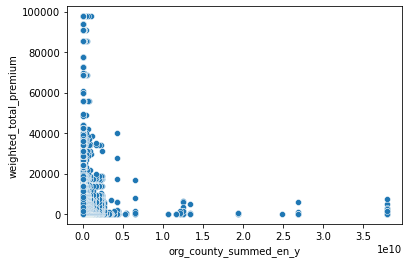

In [675]:
sns.scatterplot(data = three_five, x = 'org_county_summed_en_y', y= 'weighted_total_premium')